# Baseline Models

We will develop the baseline neural network model (one hidden layer, 3-node softmax output) for comparisons for later architectures.

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [2]:
# Reading in Data
data_path = 'data/upsampled_data.csv'
data_final = pd.read_csv(data_path)
data_final = data_final.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [3]:
data_final.shape

(68955, 111)

In [4]:
# LOPO Splitting
def train_test_split(protein, curr_data):
    train_data = curr_data[curr_data.protein != protein].drop(['protein', 'pdb', 'resnum'], axis=1)
    test_data = curr_data[curr_data.protein == protein].drop(['protein', 'pdb', 'resnum'], axis=1)
    
    y_train = train_data.type
    encoder = LabelEncoder()
    encoder.fit(y_train)
    encoded_y_train = encoder.transform(y_train)
    y_train_oh = np_utils.to_categorical(encoded_y_train)
    
    scaler_train = StandardScaler()
    x_train = train_data.drop(['type'], axis=1)
    x_columns = x_train.columns
    x_train = scaler_train.fit_transform(x_train)
    x_train = pd.DataFrame(x_train, columns=x_columns)
    
    y_test = test_data.type
    encoder = LabelEncoder()
    encoder.fit(y_test)
    encoded_y_test = encoder.transform(y_test)
    y_test_oh = np_utils.to_categorical(encoded_y_test)
    
    scaler_test = StandardScaler()
    x_test = test_data.drop(['type'], axis=1)
    x_test = scaler_test.fit_transform(x_test)
    x_test = pd.DataFrame(x_test, columns=x_columns)

    return x_train, y_train_oh, x_test, y_test_oh

In [8]:
# Baseline Model
def baseline_model():
    model = Sequential()
    model.add(Dense(256, input_dim = 107, activation = 'relu'))
    model.add(Dense(3, activation='softmax'))
    opt = optimizers.Adam(learning_rate = 0.01)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return(model)

In [9]:
# Baseline Analysis
def baseline(protein):
    # Split Training Data based on Protein
    x_train, y_train, x_test, y_test = train_test_split(protein, data_final)
    
    # Build Model
    # 40 epochs based on initial runs and graphing of loss over time.
    estimator = KerasClassifier(build_fn=baseline_model, epochs=20, batch_size=64, verbose=1)
    estimator.fit(x_train, y_train, verbose=1)
    
    # Generate Analysis Characteristics
    probs = estimator.predict_proba(x_test)
    predictions = estimator.predict(x_test)
    precision = precision_score(np.argmax(y_test,1), predictions, average="macro", zero_division=0)
    score = estimator.score(x_test, y_test)

    print('Accuracy: {}'.format(score))
    print('Precision: {}'.format(precision))
    
    # Plotting Confusion Matrices
    cmatrix = confusion_matrix(np.argmax(y_test,1), predictions)
    fig, ax = plt.subplots()
    sns.heatmap(cmatrix, xticklabels = ['Beneficial', 'Deleterious', 'Neutral'], yticklabels = ['Beneficial', 'Deleterious', 'Neutral'])
    ax.set_title('{}'.format(protein))
    plt.savefig('img/baseline-upsampled-cmatrix/' + protein + '-baseline-upsampled-cmatrix.png', dpi=300)

Epoch 1/20
39750/39750 [==============================] - 2s 48us/step - loss: 0.9279 - accuracy: 0.5568
Epoch 2/20
39750/39750 [==============================] - 2s 44us/step - loss: 0.8669 - accuracy: 0.5924
Epoch 3/20
39750/39750 [==============================] - 2s 46us/step - loss: 0.8376 - accuracy: 0.6112
Epoch 4/20
39750/39750 [==============================] - 2s 48us/step - loss: 0.8142 - accuracy: 0.6261
Epoch 5/20
39750/39750 [==============================] - 2s 45us/step - loss: 0.7988 - accuracy: 0.6399
Epoch 6/20
39750/39750 [==============================] - 2s 45us/step - loss: 0.7804 - accuracy: 0.6463
Epoch 7/20
39750/39750 [==============================] - 2s 44us/step - loss: 0.7686 - accuracy: 0.6523
Epoch 8/20
39750/39750 [==============================] - 2s 45us/step - loss: 0.7525 - accuracy: 0.6630
Epoch 9/20
39750/39750 [==============================] - 2s 45us/step - loss: 0.7429 - accuracy: 0.6713
Epoch 10/20
39750/39750 [==============================

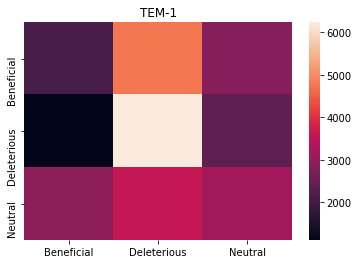

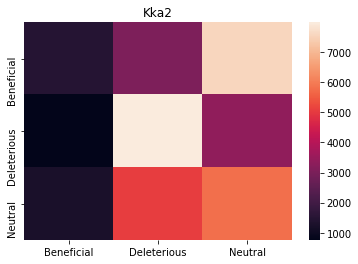

In [11]:
baseline('TEM-1')
baseline('Kka2')